In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [50]:
BASE = '/kaggle/input/store-sales-time-series-forecasting/'

train = pd.read_csv(BASE + "train.csv")
test = pd.read_csv(BASE + "test.csv")
oil = pd.read_csv(BASE + "oil.csv")
stores = pd.read_csv(BASE + "stores.csv")
transactions = pd.read_csv(BASE + "transactions.csv")
holidays_events = pd.read_csv(BASE + "holidays_events.csv")
sample_submission = pd.read_csv(BASE + "sample_submission.csv")

In [51]:
test['test'] = 1
train['test'] = 0
df2 = pd.concat([train, test], axis=0)

In [52]:
df2

,id,date,store_nbr,family,sales,onpromotion,test
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0
1,1,2013-01-01,1,BABY CARE,0.0,0,0
2,2,2013-01-01,1,BEAUTY,0.0,0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0,0
4,4,2013-01-01,1,BOOKS,0.0,0,0
...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,NaN,1,1
28508,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,1
28509,3029397,2017-08-31,9,PRODUCE,NaN,1,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,1


In [53]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [54]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [55]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [56]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [57]:
df2.isna().sum()

id                 0
date               0
store_nbr          0
family             0
sales          28512
onpromotion        0
test               0
dtype: int64

In [58]:
df2.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
test             int64
dtype: object

In [59]:
def datetime(df):
    df2['date'] = pd.to_datetime(df2["date"])
    df2['year'] = df2['date'].dt.year
    df2['month'] = df2['date'].dt.month
    df2['day'] = df2['date'].dt.day
    df2['day_of_week'] = df2['date'].dt.day_of_week
    df2['day_name'] = df2['date'].dt.day_name()
    df2['quarter'] = df2['date'].dt.quarter
    df2['is_leap_year'] = df2['date'].dt.is_leap_year
    return df2

In [60]:
df2 = datetime(df2)

In [61]:
df2.head()

,id,date,store_nbr,family,sales,onpromotion,test,year,month,day,day_of_week,day_name,quarter,is_leap_year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,2013,1,1,1,Tuesday,1,False
1,1,2013-01-01,1,BABY CARE,0.0,0,0,2013,1,1,1,Tuesday,1,False
2,2,2013-01-01,1,BEAUTY,0.0,0,0,2013,1,1,1,Tuesday,1,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,0,2013,1,1,1,Tuesday,1,False
4,4,2013-01-01,1,BOOKS,0.0,0,0,2013,1,1,1,Tuesday,1,False


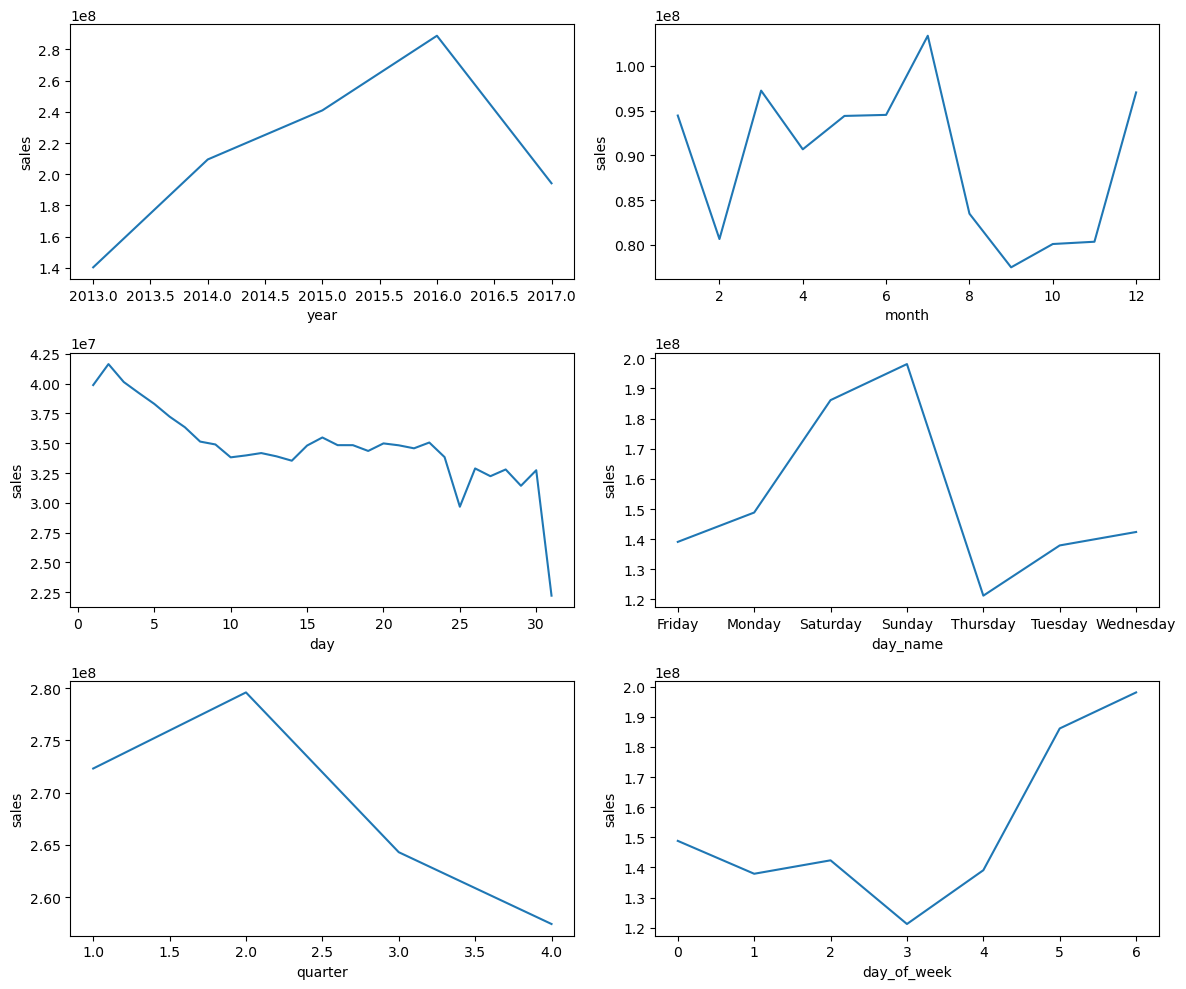

In [62]:
grouping_columns = ['year', 'month', 'day', 'day_name', 'quarter', 'day_of_week']

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for ind, column in enumerate(grouping_columns):
    grouped_data = df2.groupby(column)['sales'].sum()
    grouped_data = pd.DataFrame(grouped_data).reset_index()

    sns.lineplot(data=grouped_data, x=column, y='sales', ax=axes[ind])

plt.tight_layout()
plt.show()

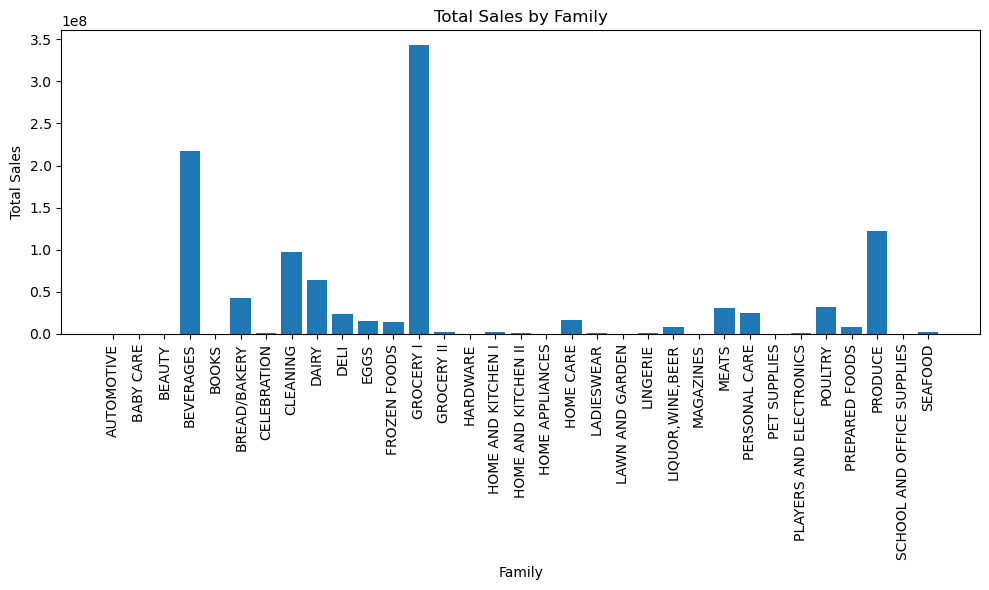

In [63]:
best_family = df2.groupby('family')['sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(best_family['family'], best_family['sales'])
plt.xlabel('Family')
plt.ylabel('Total Sales')
plt.title('Total Sales by Family')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

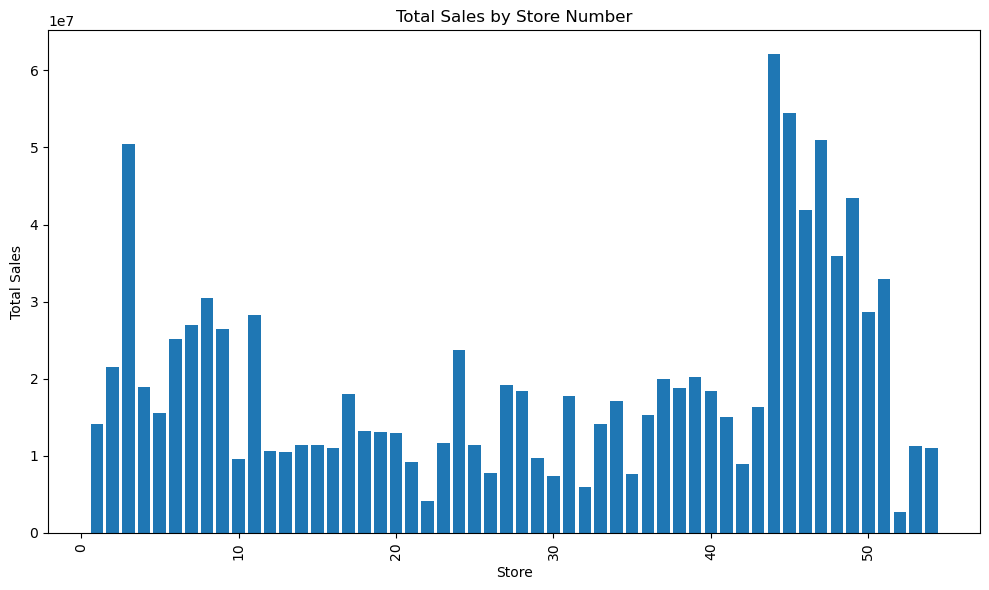

In [64]:
best_store = df2.groupby('store_nbr')['sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(best_store['store_nbr'], best_store['sales'])
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store Number')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [65]:
bs_sorted = best_store.sort_values(by='sales', ascending=False)
city_sales = pd.merge(bs_sorted, stores, on='store_nbr', how='left')

city_sales['ratio'] = 0

for city in city_sales['city'].unique():
    ratio = len(city_sales.loc[city_sales['city'] == city]) / len(city_sales)
    city_sales.loc[city_sales['city'] == city, 'ratio'] = ratio

city_sales.head()

,store_nbr,sales,city,state,type,cluster,ratio
0,44,6.208755e+07,Quito,Pichincha,A,5,0.333333
1,45,5.449801e+07,Quito,Pichincha,A,11,0.333333
2,47,5.094831e+07,Quito,Pichincha,A,14,0.333333
3,3,5.048191e+07,Quito,Pichincha,D,8,0.333333
4,49,4.342010e+07,Quito,Pichincha,A,11,0.333333


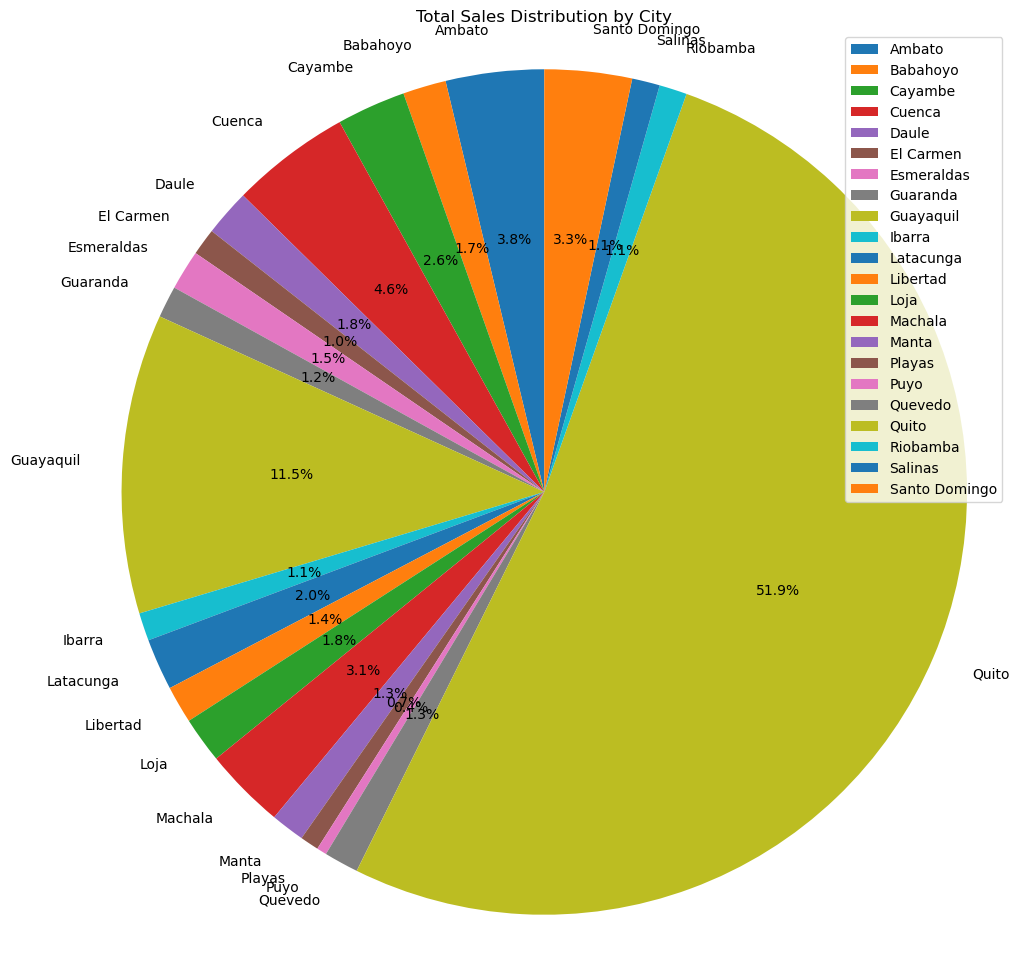

In [66]:
best_city = city_sales.groupby('city')['sales'].sum().reset_index()

plt.figure(figsize=(12, 12))
patches, _, _ = plt.pie(best_city['sales'], labels=best_city['city'], autopct='%1.1f%%', startangle=90)
plt.legend(patches, best_city['city'], loc='best')

plt.axis('equal')
plt.title('Total Sales Distribution by City')

plt.show()

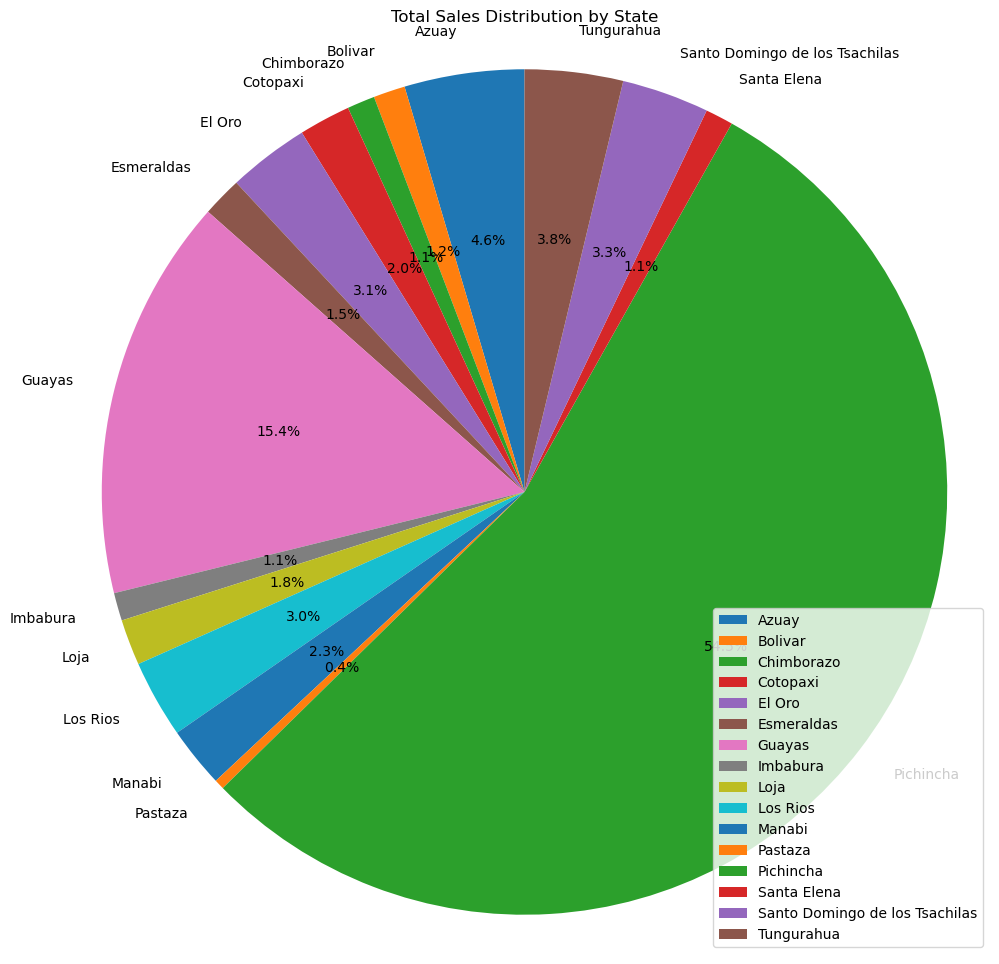

In [67]:
best_state = city_sales.groupby('state')['sales'].sum().reset_index()

plt.figure(figsize=(12, 12))
patches, _, _ = plt.pie(best_state['sales'], labels=best_state['state'], autopct='%1.1f%%', startangle=90)
plt.legend(patches, best_state['state'], loc='best')

plt.axis('equal')
plt.title('Total Sales Distribution by State')

plt.show()

In [68]:
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
transactions['date'] = pd.to_datetime(transactions['date'])

In [69]:
df2 = pd.merge(df2, stores, on='store_nbr', how='left')

In [70]:
df2 = pd.merge(df2, holidays_events, on='date', how='left')


In [72]:
df2.head()

,id,date,store_nbr,family,sales,onpromotion,test,year,month,day,...,is_leap_year,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,2013,1,1,...,False,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,0,2013,1,1,...,False,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,0,2013,1,1,...,False,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,0,2013,1,1,...,False,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,0,2013,1,1,...,False,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False


In [73]:
df2.isna().sum()

id                    0
date                  0
store_nbr             0
family                0
sales             28512
onpromotion           0
test                  0
year                  0
month                 0
day                   0
day_of_week           0
day_name              0
quarter               0
is_leap_year          0
city                  0
state                 0
type_x                0
cluster               0
type_y          2578554
locale          2578554
locale_name     2578554
description     2578554
transferred     2578554
dtype: int64

In [74]:
df2.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'test',
       'year', 'month', 'day', 'day_of_week', 'day_name', 'quarter',
       'is_leap_year', 'city', 'state', 'type_x', 'cluster', 'type_y',
       'locale', 'locale_name', 'description', 'transferred'],
      dtype='object')

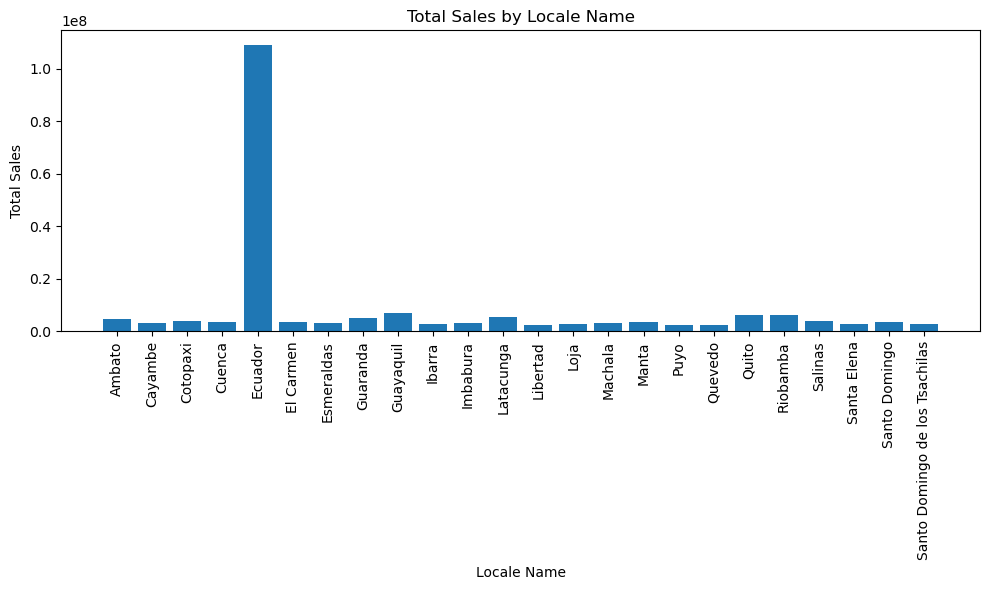

In [80]:
grouped_by_locale_name = df2.groupby('locale_name')['sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(grouped_by_locale_name['locale_name'], grouped_by_locale_name['sales'])
plt.xlabel('Locale Name')
plt.ylabel('Total Sales')
plt.title('Total Sales by Locale Name')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

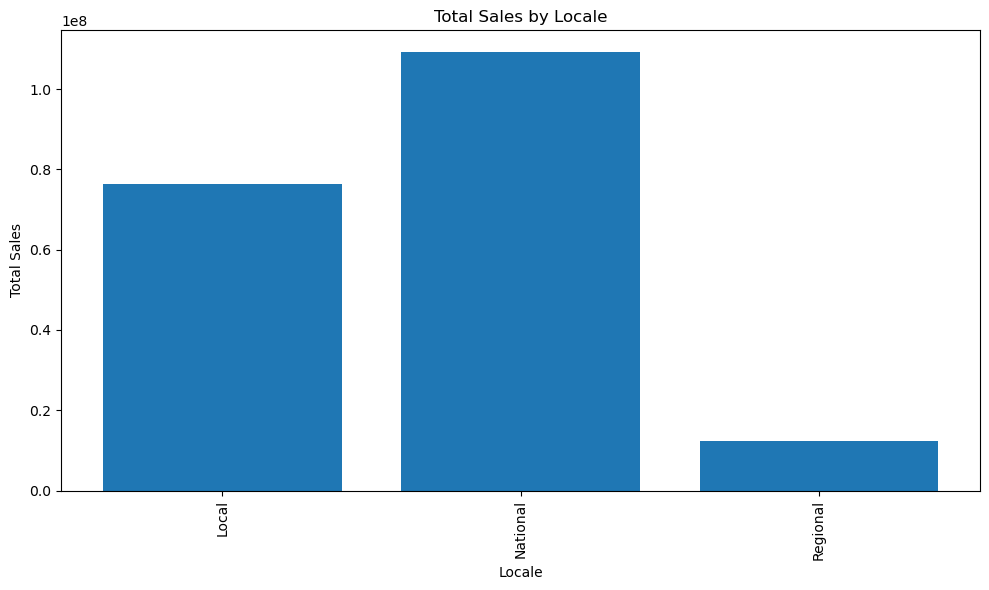

In [81]:
grouped_by_locale = df2.groupby('locale')['sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(grouped_by_locale['locale'], grouped_by_locale['sales'])
plt.xlabel('Locale')
plt.ylabel('Total Sales')
plt.title('Total Sales by Locale')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [82]:
df2.head()

,id,date,store_nbr,family,sales,onpromotion,test,year,month,day,...,is_leap_year,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,2013,1,1,...,False,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,0,2013,1,1,...,False,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,0,2013,1,1,...,False,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,0,2013,1,1,...,False,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,0,2013,1,1,...,False,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False


In [83]:
df2.dtypes

id                       int64
date            datetime64[ns]
store_nbr                int64
family                  object
sales                  float64
onpromotion              int64
test                     int64
year                     int64
month                    int64
day                      int64
day_of_week              int64
day_name                object
quarter                  int64
is_leap_year              bool
city                    object
state                   object
type_x                  object
cluster                  int64
type_y                  object
locale                  object
locale_name             object
description             object
transferred             object
dtype: object

In [84]:
df2.drop('description', inplace=True, axis=1)
df2.drop('date', inplace=True, axis=1)

In [85]:
cat_cols = ['family','city','state','type_x','type_y','locale','locale_name']

In [86]:
from sklearn.preprocessing import LabelEncoder


df2_encoded = pd.get_dummies(df2, columns=cat_cols)

label_encode_cols = ['is_leap_year', 'transferred']
label_encoder = LabelEncoder()

for col in label_encode_cols:
    df2_encoded[col] = label_encoder.fit_transform(df2_encoded[col])


day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# cyclic encoding features for day_name
df2_encoded['day_sin'] = df2_encoded['day_name'].map(lambda x: np.sin(2 * np.pi * day_mapping[x] / 7))
df2_encoded['day_cos'] = df2_encoded['day_name'].map(lambda x: np.cos(2 * np.pi * day_mapping[x] / 7))

df2_encoded.drop('day_name', axis=1, inplace=True)
df2_encoded.head()

,id,store_nbr,sales,onpromotion,test,year,month,day,day_of_week,quarter,...,locale_name_Puyo,locale_name_Quevedo,locale_name_Quito,locale_name_Riobamba,locale_name_Salinas,locale_name_Santa Elena,locale_name_Santo Domingo,locale_name_Santo Domingo de los Tsachilas,day_sin,day_cos
0,0,1,0.0,0,0,2013,1,1,1,1,...,0,0,0,0,0,0,0,0,0.781831,0.62349
1,1,1,0.0,0,0,2013,1,1,1,1,...,0,0,0,0,0,0,0,0,0.781831,0.62349
2,2,1,0.0,0,0,2013,1,1,1,1,...,0,0,0,0,0,0,0,0,0.781831,0.62349
3,3,1,0.0,0,0,2013,1,1,1,1,...,0,0,0,0,0,0,0,0,0.781831,0.62349
4,4,1,0.0,0,0,2013,1,1,1,1,...,0,0,0,0,0,0,0,0,0.781831,0.62349


In [87]:
target = 'sales'

X = df2_encoded[df2_encoded['test'] == 0]
X = X.drop(target, axis=1)

y = df2_encoded[df2_encoded['test'] == 0]
y = y[target]

test = df2_encoded[df2_encoded['test'] == 1]
test = test.drop(target, axis=1)

In [88]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
best_params = {
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror',
}

model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [91]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error: 145207.7843
Mean Absolute Error (MAE): 131.8277
R-squared (R2): 0.8786


In [93]:
pred = model.predict(test)

In [94]:
sample_submission['sales'] = pred
sample_submission

,id,sales
0,3000888,-1.836092
1,3000889,-1.836092
2,3000890,52.917561
3,3000891,2590.431396
4,3000892,-1.836092
...,...,...
28507,3029395,340.067657
28508,3029396,57.539185
28509,3029397,2330.845459
28510,3029398,277.723877


In [95]:
sample_submission.to_csv('submission_ts.csv', index=False)
